<a href="https://colab.research.google.com/github/DivjotBanga/DivjotBanga.github.io/blob/master/PCA_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [424]:
!pip install pandas==0.24.0

# PCA

![alt text](https://media.giphy.com/media/Lyejb62QjQepG/giphy.gif)

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import svm

In [426]:
drive.mount('./data')

Drive already mounted at ./data; to attempt to forcibly remount, call drive.mount("./data", force_remount=True).


In [0]:
car_study_data = pd.read_csv('./data/My Drive/ML_training/vehicle.csv')

In [428]:
car_study_data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


Inspec the Dataset

In [429]:
car_study_data.shape

(846, 19)

In [430]:
car_study_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [431]:
car_study_data.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


checking for Null values

In [432]:
nullsFields = round((car_study_data.isnull().sum() / len(car_study_data) ) * 100, 2)
nullsFields

compactness                    0.00
circularity                    0.59
distance_circularity           0.47
radius_ratio                   0.71
pr.axis_aspect_ratio           0.24
max.length_aspect_ratio        0.00
scatter_ratio                  0.12
elongatedness                  0.12
pr.axis_rectangularity         0.35
max.length_rectangularity      0.00
scaled_variance                0.35
scaled_variance.1              0.24
scaled_radius_of_gyration      0.24
scaled_radius_of_gyration.1    0.47
skewness_about                 0.71
skewness_about.1               0.12
skewness_about.2               0.12
hollows_ratio                  0.00
class                          0.00
dtype: float64

In [433]:
car_study_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
labelencoder_X = LabelEncoder()
labelencoder_X.fit(car_study_data['class'])
car_study_data['class'] = labelencoder_X.transform(car_study_data['class'])

In [0]:
car_study_data_na = car_study_data.interpolate(method='linear' ,axis=1)

In [436]:
car_study_data_na.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [437]:
car_study_data_na.duplicated().sum()

0

In [438]:
print(car_study_data_na.count())
print(car_study_data.count())

compactness                    846
circularity                    846
distance_circularity           846
radius_ratio                   846
pr.axis_aspect_ratio           846
max.length_aspect_ratio        846
scatter_ratio                  846
elongatedness                  846
pr.axis_rectangularity         846
max.length_rectangularity      846
scaled_variance                846
scaled_variance.1              846
scaled_radius_of_gyration      846
scaled_radius_of_gyration.1    846
skewness_about                 846
skewness_about.1               846
skewness_about.2               846
hollows_ratio                  846
class                          846
dtype: int64
compactness                    846
circularity                    841
distance_circularity           842
radius_ratio                   840
pr.axis_aspect_ratio           844
max.length_aspect_ratio        846
scatter_ratio                  845
elongatedness                  845
pr.axis_rectangularity         843
max.len

In [439]:
car_study_data_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

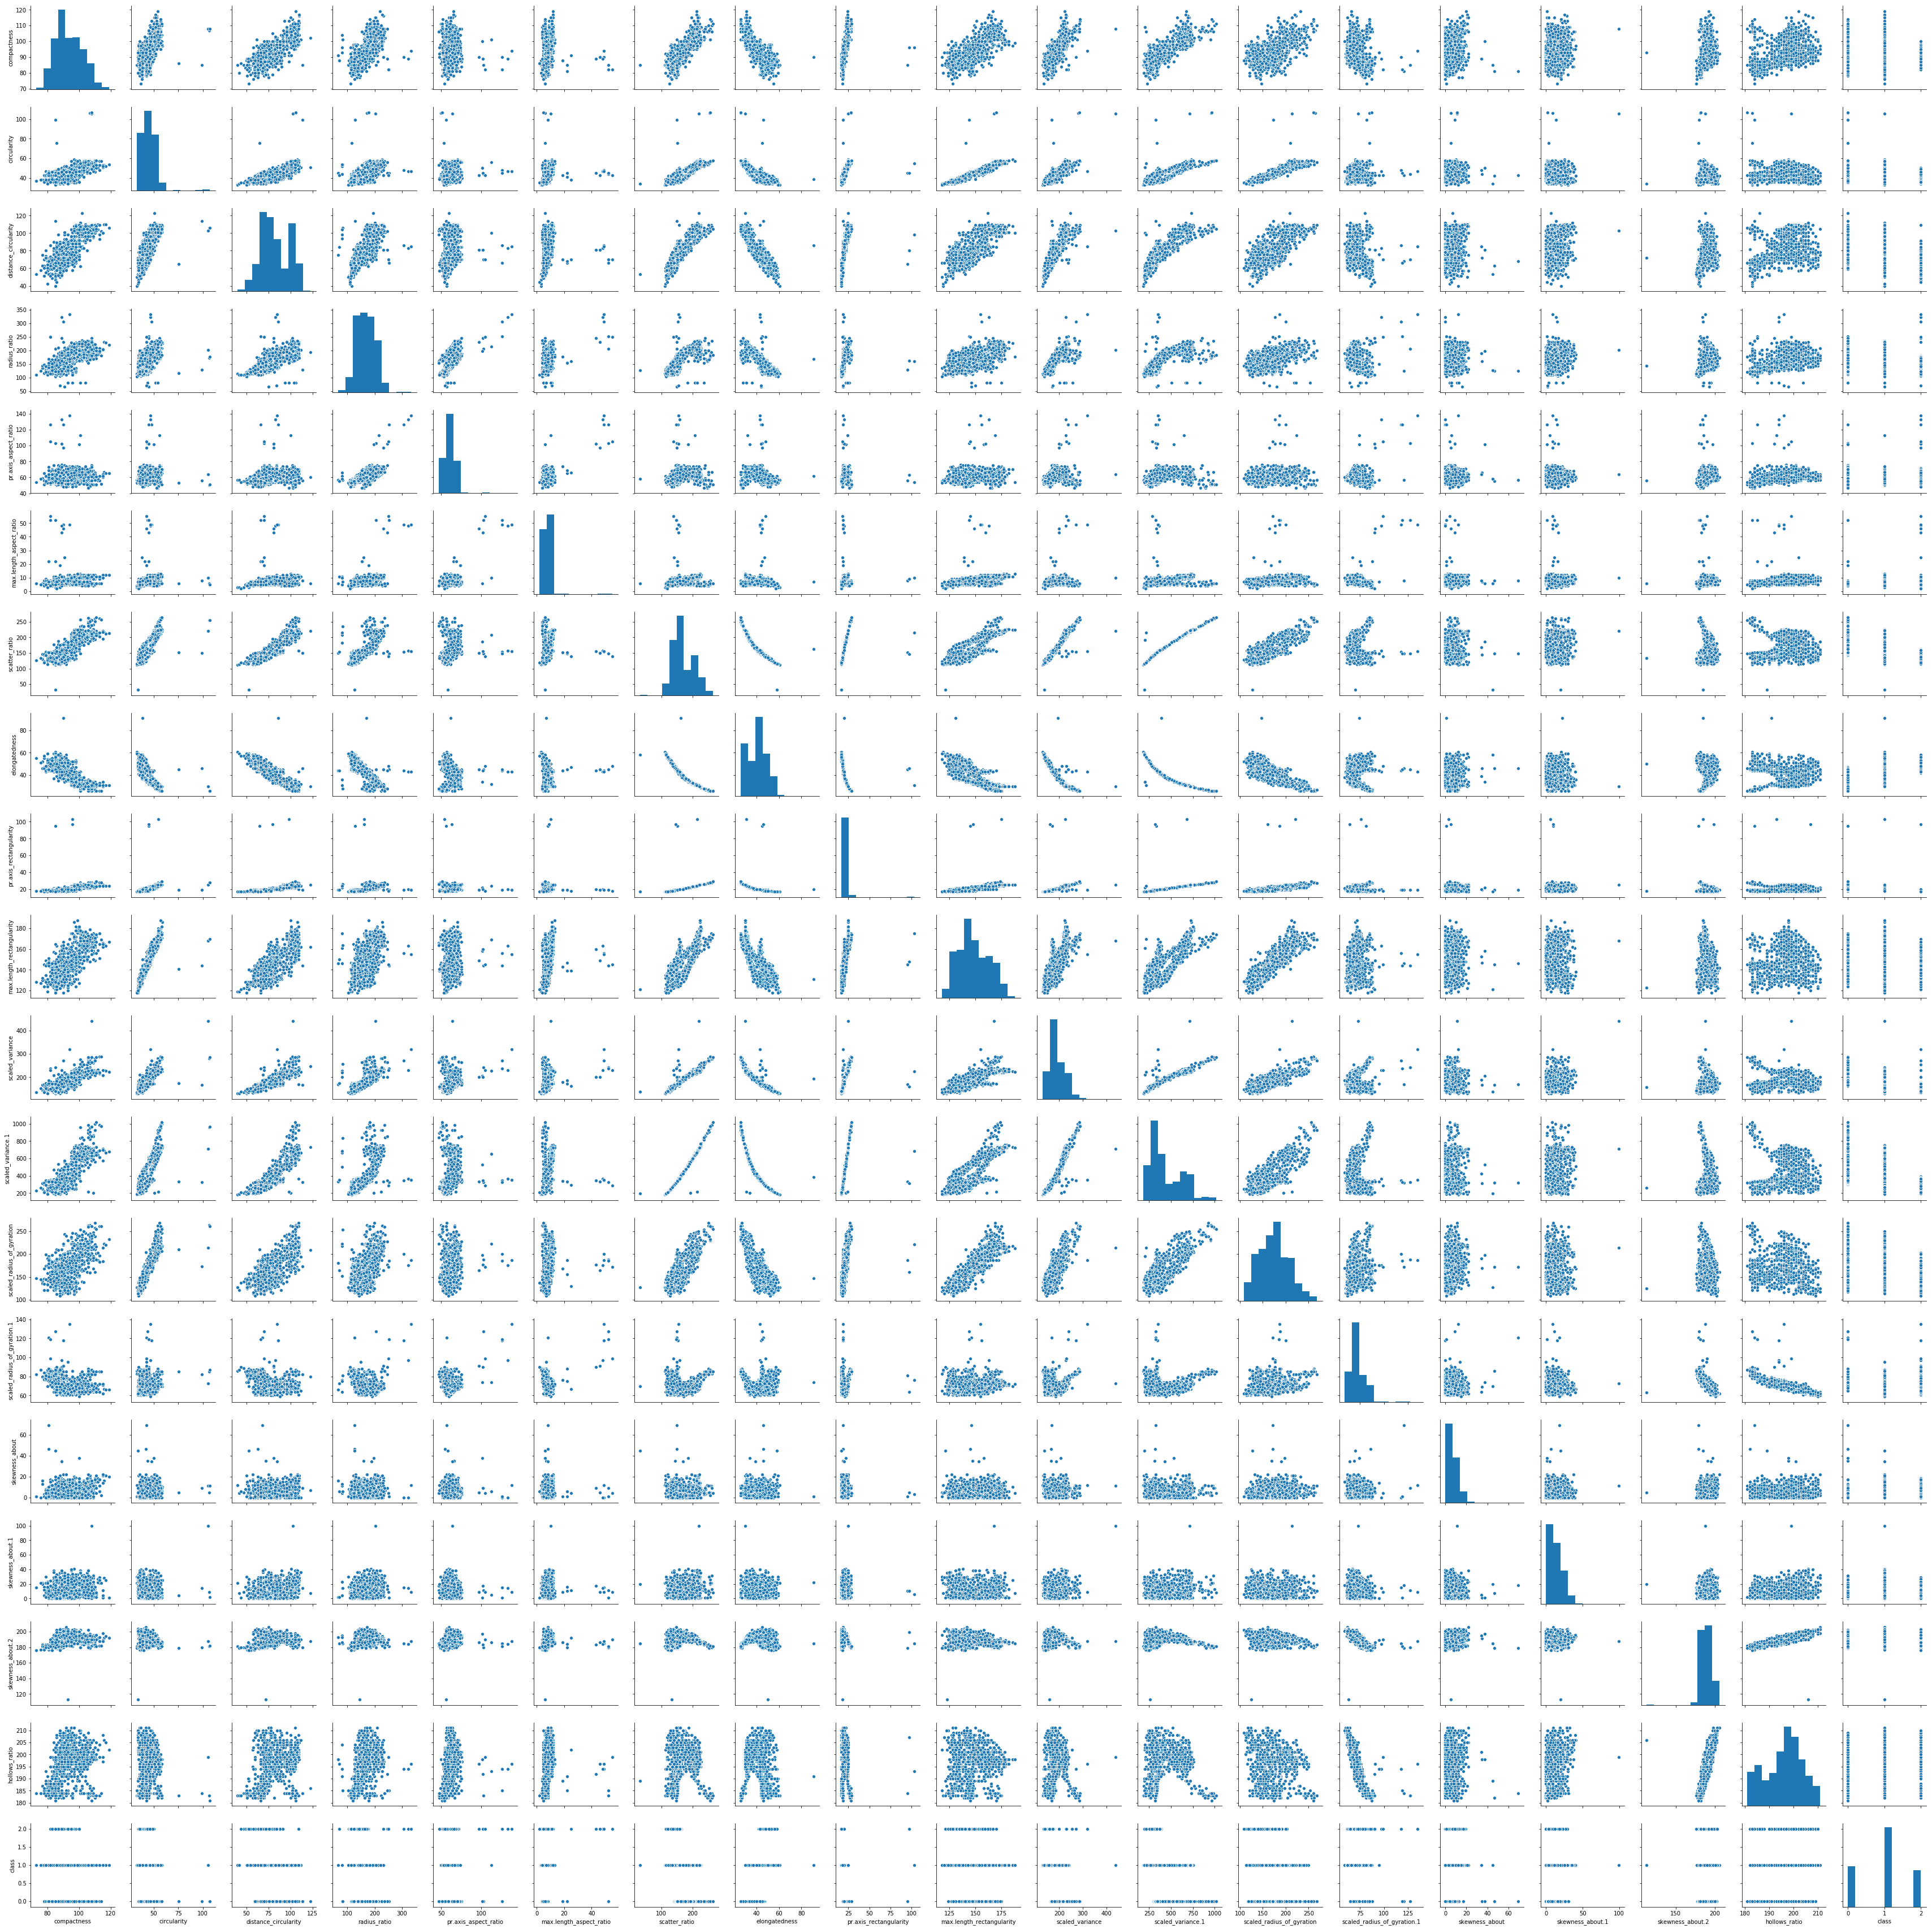

In [440]:
sns.pairplot(car_study_data_na)
plt.show()

In [0]:
corr = car_study_data_na.corr()

In [442]:
for i in car_study_data_na.columns:
  print(str(i)+":"+str(car_study_data_na[i].unique()))

compactness:[ 95.  91. 104.  93.  85. 107.  97.  90.  86.  88.  89.  94.  96.  99.
 101.  84.  87.  83. 102.  80. 100.  82. 106.  81. 119.  78.  92.  98.
 103.  77.  73.  79. 110. 108. 109. 111. 105. 112. 116. 113. 117. 115.
  76. 114.]
circularity:[ 48.          41.          50.          44.         106.5
  43.          34.          36.          46.          42.
  49.          55.          54.          56.          47.
  37.          39.          53.          45.          38.
  35.          40.          59.          52.          51.
  58.         105.5         99.33333333  57.          33.
  75.5        107.        ]
distance_circularity:[ 83.          84.         106.          82.          70.
  73.          66.          62.          98.          74.
  85.          79.         103.          51.          77.
 100.          75.          53.          64.         105.
  80.          54.          63.         107.         109.
  72.          86.          68.         104.          87.
  76.

In [443]:
corr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.600019,0.785836,0.668207,0.099223,0.148249,0.809284,-0.773475,0.389583,0.676143,0.749853,0.809109,0.582155,-0.256058,0.152919,0.168249,0.275923,0.365552,-0.033796
circularity,0.600019,1.000000,0.704057,0.483777,0.100633,0.192782,0.756294,-0.708390,0.394407,0.829093,0.752835,0.749615,0.830587,0.091382,0.100410,0.061134,-0.101831,-0.016188,-0.177362
distance_circularity,0.785836,0.704057,1.000000,0.728024,0.158145,0.260699,0.899869,-0.883444,0.431914,0.771105,0.837142,0.877926,0.701749,-0.223684,0.059822,0.261545,0.139047,0.323158,-0.068878
radius_ratio,0.668207,0.483777,0.728024,1.000000,0.643068,0.439285,0.702227,-0.739306,0.304440,0.543059,0.741626,0.684096,0.505456,-0.183514,0.001320,0.177706,0.350359,0.461085,-0.174342
pr.axis_aspect_ratio,0.099223,0.100633,0.158145,0.643068,1.000000,0.623518,0.112582,-0.185275,0.016877,0.136965,0.268029,0.097276,0.130148,0.138940,-0.029855,-0.039401,0.225790,0.256943,-0.102418
max.length_aspect_ratio,0.148249,0.192782,0.260699,0.439285,0.623518,1.000000,0.167020,-0.178346,0.084146,0.305943,0.309329,0.142149,0.188404,0.283635,-0.000180,0.044642,-0.016599,0.143919,0.207619
scatter_ratio,0.809284,0.756294,0.899869,0.702227,0.112582,0.167020,1.000000,-0.950392,0.486363,0.809338,0.922878,0.985467,0.796234,-0.032956,0.016245,0.213015,0.021875,0.121584,-0.286197
elongatedness,-0.773475,-0.708390,-0.883444,-0.739306,-0.185275,-0.178346,-0.950392,1.000000,-0.457137,-0.766024,-0.889679,-0.929761,-0.752198,0.106520,-0.022596,-0.179589,-0.122623,-0.216254,0.331635
pr.axis_rectangularity,0.389583,0.394407,0.431914,0.304440,0.016877,0.084146,0.486363,-0.457137,1.000000,0.426803,0.442050,0.484058,0.412434,-0.003783,-0.010255,0.085720,-0.010999,0.041993,-0.123849
max.length_rectangularity,0.676143,0.829093,0.771105,0.543059,0.136965,0.305943,0.809338,-0.766024,0.426803,1.000000,0.728393,0.790766,0.864646,0.035606,0.100020,0.016619,-0.072820,0.076770,-0.032399


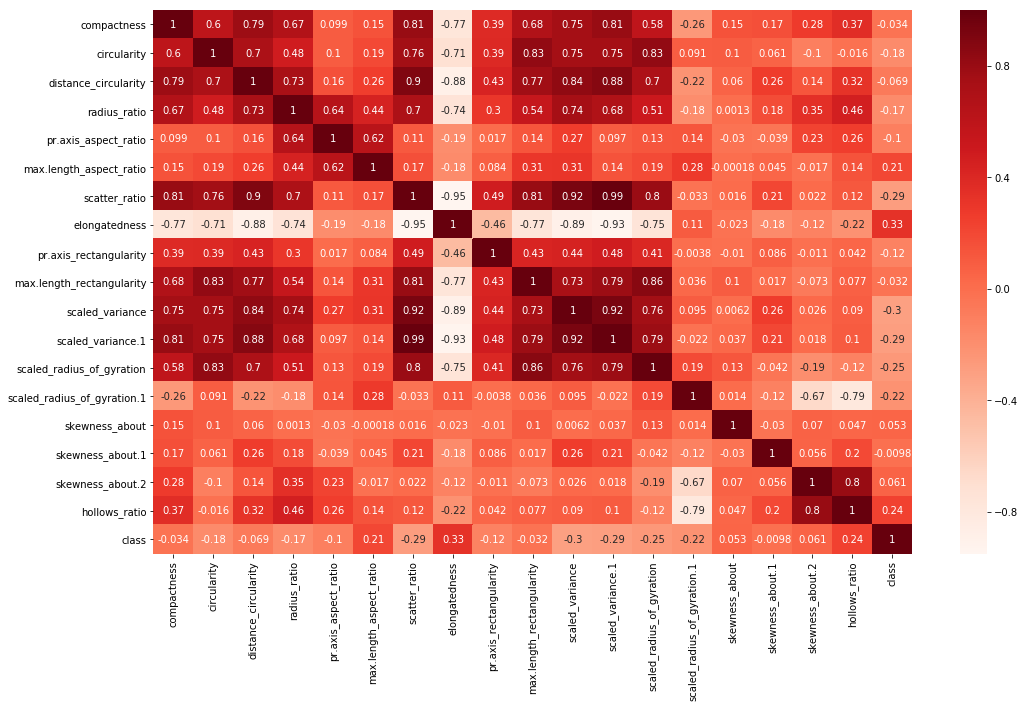

In [444]:
plt.subplots(figsize=(17,10))  
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [445]:
cor_target = abs(corr["class"])
relevant_features = cor_target[cor_target>0.25]
relevant_features

scatter_ratio                0.286197
elongatedness                0.331635
scaled_variance              0.296690
scaled_variance.1            0.287671
scaled_radius_of_gyration    0.253362
class                        1.000000
Name: class, dtype: float64

In [446]:
X = car_study_data_na.loc[:,car_study_data_na.columns!='class']
y = car_study_data_na['class']
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [447]:
coef[coef!=0]

compactness                  0.020917
distance_circularity         0.027500
radius_ratio                -0.000128
pr.axis_aspect_ratio        -0.011850
max.length_aspect_ratio      0.022819
scatter_ratio               -0.011329
elongatedness                0.043384
max.length_rectangularity    0.026243
scaled_variance             -0.001591
scaled_variance.1           -0.000654
scaled_radius_of_gyration   -0.006601
hollows_ratio                0.004029
dtype: float64

In [0]:
variable_to_consider = ['compactness','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','hollows_ratio','class']

In [0]:
car_study_data_na.columns
data = car_study_data_na[variable_to_consider]

In [0]:
 def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [451]:
for i in variable_to_consider:
    print(i)
    print(data.count())
    data = remove_outlier(data,i)

compactness
compactness                  846
distance_circularity         846
radius_ratio                 846
pr.axis_aspect_ratio         846
max.length_aspect_ratio      846
scatter_ratio                846
elongatedness                846
max.length_rectangularity    846
scaled_variance              846
scaled_variance.1            846
scaled_radius_of_gyration    846
hollows_ratio                846
class                        846
dtype: int64
distance_circularity
compactness                  846
distance_circularity         846
radius_ratio                 846
pr.axis_aspect_ratio         846
max.length_aspect_ratio      846
scatter_ratio                846
elongatedness                846
max.length_rectangularity    846
scaled_variance              846
scaled_variance.1            846
scaled_radius_of_gyration    846
hollows_ratio                846
class                        846
dtype: int64
radius_ratio
compactness                  846
distance_circularity         846
radi

In [0]:
X = car_study_data_na.loc[:,car_study_data_na.columns != 'class']
y = car_study_data_na['class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
pca = PCA(.95)

In [456]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_train_p = pca.transform(X_train)
X_test_p = pca.transform(X_test)

In [469]:
trainedsvm = svm.SVC().fit(X_train_p, y_train)
predictionsvm = trainedsvm.predict(X_test_p)
print(confusion_matrix(y_test,predictionsvm))
print(classification_report(y_test,predictionsvm))

[[ 71   5   2]
 [  2 112   4]
 [  2   2  54]]
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        78
         1.0       0.94      0.95      0.95       118
         2.0       0.90      0.93      0.92        58

    accuracy                           0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [470]:
print("Accuracy:",accuracy_score(y_test, predictionsvm))

Accuracy: 0.9330708661417323
